# AdaBoost:

- Initialize weights [equal weights for all samples]
    - $w_i = 1 / n$  ($n$ refers to the number of samples)
- Train weak learner [fitting on weighted data]
- Compute the error ($\alpha$) and with it's help compute the model's vote strength ($\epsilon_t$) [After the first weak learner is trained]
    - $\alpha_t = \frac{1}{2} \ln(\frac{1 - \epsilon_t}{\epsilon_t})$
- Update Sample weights ($w_i$)
- Normalize the weights (to keep sum of all weight = 1)
- Repeat this steps

**Types of Data:**

- was initially designed for binary classification.
- mult-class classification can be used by using `'SAMME'` algorithm.

---
AdaBoost Sample Implementation:

In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns, matplotlib.pyplot as plt 

from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
X, y = make_classification(
    n_samples=1200,
    n_features=12,
    n_classes=2,
    n_informative=6
    n_redundant=2,
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3389127491.py, line 5)

Text(0.5, 1.0, 'Classes Distribution:')

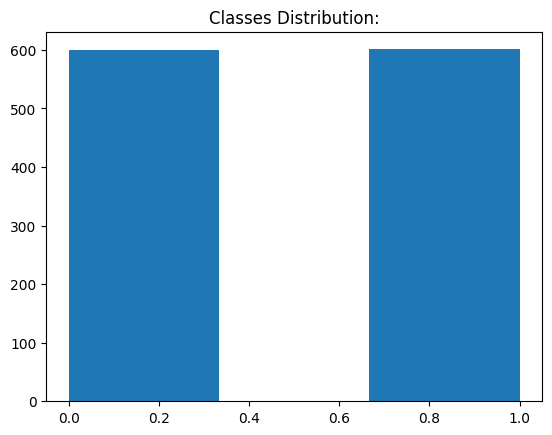

In [45]:
plt.hist(y, bins=3)
plt.title('Classes Distribution:')

In [46]:
ada = AdaBoostClassifier(
    n_estimators=150,
    random_state=100
)

In [47]:
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=150, random_state=100)

In [48]:
y_pred = ada.predict(X_test)

In [49]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

Accuracy Score: 0.7361111111111112


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       186
           1       0.73      0.72      0.73       174

    accuracy                           0.74       360
   macro avg       0.74      0.74      0.74       360
weighted avg       0.74      0.74      0.74       360



---

# XGBoost:

- Extreme Gradient Boosting.
- Steps remains kinda same as that of AdaBoost, unlike XGBoost uses *gradients (loss derivatives)* to improve future trees instead of just reweighting samples.
- Here also the algorithm starts with the initialization of predictions and rest all steps are kinda simlar as both are boosting methods.

- `pip install xgboost`
- Supports the use of GPU [cuda].
- Also it has `xgboost.DMatrix` matrices for faster calculations.

In [78]:
from sklearn.datasets import load_breast_cancer

In [79]:
data = load_breast_cancer()

X, y = data.data, data.target
target_names = data.target_names

In [80]:
X.shape

(569, 30)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 40)

In [82]:
import xgboost as xgb
from xgboost import XGBClassifier

In [83]:
model = XGBClassifier(
    n_estimators = 150,
    max_depth=4,
    learning_rate = 0.1,
    subsample=0.8, # % of training rows
    colsample_bytree = 0.8, # % of col sampled for each tree... 
    use_label_encoder = False, 
    eval_metric = 'logloss' # binary class..., others: 'error', 'auc' | 'mlogloss', 'merror' for multiclass...
)

In [84]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, ...)

In [85]:
y_pred = model.predict(X_test)

In [87]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

Accuracy Score: 0.9385964912280702


In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        39
           1       0.97      0.93      0.95        75

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



---